In [1]:
!pip install eppy

  Cache entry deserialization failed, entry ignored
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import os
import json
from eppy import modeleditor
from eppy.modeleditor import IDF

In [2]:
# Create a dictionary capable of modifying the Energyplus Version class
def _version(Version_Identifier="8.8.0"):
    
    vals = {
        "VERSION": [
            {
                "Version_Identifier": Version_Identifier,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Simulation Control class
def _simulation_control(
    Do_Zone_Sizing_Calculation="No", 
    Do_System_Sizing_Calculation="No", 
    Do_Plant_Sizing_Calculation="No", 
    Run_Simulation_for_Sizing_Periods="No", 
    Run_Simulation_for_Weather_File_Run_Periods="Yes"
):

    vals = {
    "SIMULATIONCONTROL": [
            {
                "Do_Zone_Sizing_Calculation": Do_Zone_Sizing_Calculation,
                "Do_System_Sizing_Calculation": Do_System_Sizing_Calculation,
                "Do_Plant_Sizing_Calculation": Do_Plant_Sizing_Calculation,
                "Run_Simulation_for_Sizing_Periods": Run_Simulation_for_Sizing_Periods,
                "Run_Simulation_for_Weather_File_Run_Periods": Run_Simulation_for_Weather_File_Run_Periods,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Building class
def _building(
    Name="IDF Name",
    North_Axis=0, 
    Terrain="City", 
    Solar_Distribution="FullExteriorWithReflections",
    Maximum_Number_of_Warmup_Days=25,
    Minimum_Number_of_Warmup_Days=6
):

    vals = {
    "BUILDING": [
            {
                "Name": Name,
                "North_Axis": North_Axis,
                "Terrain": Terrain,
                "Solar_Distribution": Solar_Distribution,
                "Maximum_Number_of_Warmup_Days": Maximum_Number_of_Warmup_Days,
                "Minimum_Number_of_Warmup_Days": Minimum_Number_of_Warmup_Days,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Shadow Calculation class
def _shadow_calculation(
    Calculation_Method="AverageOverDaysInFrequency",
    Calculation_Frequency=30,
    Maximum_Figures_in_Shadow_Overlap_Calculations=300
):

    vals = {
    "SHADOWCALCULATION": [
            {
                "Calculation_Method": Calculation_Method,
                "Calculation_Frequency": Calculation_Frequency,
                "Maximum_Figures_in_Shadow_Overlap_Calculations": Maximum_Figures_in_Shadow_Overlap_Calculations,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Timestep class
def _timestep(Number_of_Timesteps_per_Hour=6):

    vals = {
    "TIMESTEP": [
            {
                "Number_of_Timesteps_per_Hour": Number_of_Timesteps_per_Hour,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Sizing Period Design Day class
## This used to be a massive function calculating the design-day, but that was a bit 
## silly and we only really want annual results for now
def _sizing_period_run_day():
    
    vals = {
    "SIZINGPERIOD:DESIGNDAY": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Location class
## This removes any existing data and just gets this from the weatehr file provided
def _site_location():

    vals = {
        "SITE:LOCATION": [],
    }

    return vals

# Create a dictionary capable of modifying the Energyplus Run Period class
def _run_period(
    Name="Custom Run",
    Begin_Month=1,
    Begin_Day_of_Month=1,
    End_Month=12,
    End_Day_of_Month=31,
    Day_of_Week_for_Start_Day="Monday",
    Use_Weather_File_Holidays_and_Special_Days="Yes",
    Use_Weather_File_Daylight_Saving_Period="Yes",
    Apply_Weekend_Holiday_Rule="No",
    Use_Weather_File_Rain_Indicators="Yes",
    Use_Weather_File_Snow_Indicators="Yes"
):
    
    vals = {
        "RUNPERIOD": [
            {
                "Name": Name,
                "Begin_Month": Begin_Month,
                "Begin_Day_of_Month": Begin_Day_of_Month,
                "End_Month": End_Month,
                "End_Day_of_Month": End_Day_of_Month,
                "Day_of_Week_for_Start_Day": Day_of_Week_for_Start_Day,
                "Use_Weather_File_Holidays_and_Special_Days": Use_Weather_File_Holidays_and_Special_Days,
                "Use_Weather_File_Daylight_Saving_Period": Use_Weather_File_Daylight_Saving_Period,
                "Apply_Weekend_Holiday_Rule": Apply_Weekend_Holiday_Rule,
                "Use_Weather_File_Rain_Indicators": Use_Weather_File_Rain_Indicators,
                "Use_Weather_File_Snow_Indicators": Use_Weather_File_Snow_Indicators,
            },
        ],
    }

    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Type Limits class
## THIS IS CURRENTLY SET SO THAT NO CHANGES CAN BE MADE - EASIER FOR THIS PROJECT, BUT NOT VERY EXTENSIBLE!
def _schedule_type_limits():
    
    vals = {
        "SCHEDULETYPELIMITS": [
            {
                "Name": "FractionLimits", 
                "Lower_Limit_Value": 0, 
                "Upper_Limit_Value": 1, 
                "Numeric_Type": "Continuous", 
                "Unit_Type": "Dimensionless"
            },
            {
                "Name": "On/OffLimits", 
                "Lower_Limit_Value": 0, 
                "Upper_Limit_Value": 1, 
                "Numeric_Type": "Discrete", 
                "Unit_Type": "Dimensionless"
            },
            {
                "Name": "TemperatureSetpointLimits", 
                "Lower_Limit_Value": 0, 
                "Upper_Limit_Value": 100, 
                "Numeric_Type": "Continuous", 
                "Unit_Type": "Temperature"
            },
            {
                "Name": "ActivityLevelLimits", 
                "Lower_Limit_Value": 0, 
                "Upper_Limit_Value": 430, 
                "Numeric_Type": "Continuous", 
                "Unit_Type": "ActivityLevel"
            },
        ],
    }
    
    return vals

# Create a method for loading internal gains from an internal gains dictionary
def profile_maker(_input, Name="Name", Schedule_Type_Limits_Name="FractionLimits"):
    
    vals = {
        "Name": Name, 
        "Schedule_Type_Limits_Name": Schedule_Type_Limits_Name, 
    }
    
    [vals.update({i: j}) for i, j in _input.items()]
    
    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Day Hourly class
def _schedule_day_hourly(
    Heating_Profile_Weekday={"Hour_1": 15, "Hour_2": 15, "Hour_3": 15, "Hour_4": 15, "Hour_5": 15, "Hour_6": 15, "Hour_7": 15, "Hour_8": 15, "Hour_9": 21, "Hour_10": 21, "Hour_11": 21, "Hour_12": 21, "Hour_13": 21, "Hour_14": 21, "Hour_15": 21, "Hour_16": 21, "Hour_17": 21, "Hour_18": 21, "Hour_19": 15, "Hour_20": 15, "Hour_21": 15, "Hour_22": 15, "Hour_23": 15, "Hour_24": 15}, 
    Heating_Profile_Weekend={"Hour_1": 15, "Hour_2": 15, "Hour_3": 15, "Hour_4": 15, "Hour_5": 15, "Hour_6": 15, "Hour_7": 15, "Hour_8": 15, "Hour_9": 21, "Hour_10": 21, "Hour_11": 21, "Hour_12": 21, "Hour_13": 21, "Hour_14": 21, "Hour_15": 21, "Hour_16": 21, "Hour_17": 21, "Hour_18": 21, "Hour_19": 15, "Hour_20": 15, "Hour_21": 15, "Hour_22": 15, "Hour_23": 15, "Hour_24": 15}, 
    Cooling_Profile_Weekday={"Hour_1": 100, "Hour_2": 100, "Hour_3": 100, "Hour_4": 100, "Hour_5": 100, "Hour_6": 100, "Hour_7": 100, "Hour_8": 100, "Hour_9": 24, "Hour_10": 24, "Hour_11": 24, "Hour_12": 24, "Hour_13": 24, "Hour_14": 24, "Hour_15": 24, "Hour_16": 24, "Hour_17": 24, "Hour_18": 24, "Hour_19": 100, "Hour_20": 100, "Hour_21": 100, "Hour_22": 100, "Hour_23": 100, "Hour_24": 100},
    Cooling_Profile_Weekend={"Hour_1": 100, "Hour_2": 100, "Hour_3": 100, "Hour_4": 100, "Hour_5": 100, "Hour_6": 100, "Hour_7": 100, "Hour_8": 100, "Hour_9": 24, "Hour_10": 24, "Hour_11": 24, "Hour_12": 24, "Hour_13": 24, "Hour_14": 24, "Hour_15": 24, "Hour_16": 24, "Hour_17": 24, "Hour_18": 24, "Hour_19": 100, "Hour_20": 100, "Hour_21": 100, "Hour_22": 100, "Hour_23": 100, "Hour_24": 100},
    Occupant_Profile_Weekday={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Occupant_Profile_Weekend={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Lighting_Profile_Weekday={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Lighting_Profile_Weekend={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Equipment_Profile_Weekday={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Equipment_Profile_Weekend={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Ventilation_Profile_Weekday={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Ventilation_Profile_Weekend={"Hour_1": 0, "Hour_2": 0, "Hour_3": 0, "Hour_4": 0, "Hour_5": 0, "Hour_6": 0, "Hour_7": 0, "Hour_8": 0, "Hour_9": 0, "Hour_10": 1, "Hour_11": 1, "Hour_12": 1, "Hour_13": 1, "Hour_14": 1, "Hour_15": 1, "Hour_16": 1, "Hour_17": 1, "Hour_18": 0, "Hour_19": 0, "Hour_20": 0, "Hour_21": 0, "Hour_22": 0, "Hour_23": 0, "Hour_24": 0},
    Occupant_Metabolic_Gain=120
):
    
    vals = {
        "SCHEDULE:DAY:HOURLY": [
            {
                "Name": "AlwaysOnDay",
                "Schedule_Type_Limits_Name": "On/OffLimits",
                "Hour_1": 1,
                "Hour_2": 1,
                "Hour_3": 1,
                "Hour_4": 1,
                "Hour_5": 1,
                "Hour_6": 1,
                "Hour_7": 1,
                "Hour_8": 1,
                "Hour_9": 1,
                "Hour_10": 1,
                "Hour_11": 1,
                "Hour_12": 1,
                "Hour_13": 1,
                "Hour_14": 1,
                "Hour_15": 1,
                "Hour_16": 1,
                "Hour_17": 1,
                "Hour_18": 1,
                "Hour_19": 1,
                "Hour_20": 1,
                "Hour_21": 1,
                "Hour_22": 1,
                "Hour_23": 1,
                "Hour_24": 1,
            },
            {
                "Name": "AlwaysOffDay",
                "Schedule_Type_Limits_Name": "On/OffLimits",
                "Hour_1": 0,
                "Hour_2": 0,
                "Hour_3": 0,
                "Hour_4": 0,
                "Hour_5": 0,
                "Hour_6": 0,
                "Hour_7": 0,
                "Hour_8": 0,
                "Hour_9": 0,
                "Hour_10": 0,
                "Hour_11": 0,
                "Hour_12": 0,
                "Hour_13": 0,
                "Hour_14": 0,
                "Hour_15": 0,
                "Hour_16": 0,
                "Hour_17": 0,
                "Hour_18": 0,
                "Hour_19": 0,
                "Hour_20": 0,
                "Hour_21": 0,
                "Hour_22": 0,
                "Hour_23": 0,
                "Hour_24": 0,
            },
            {
                "Name": "OccupantActivityLevelDay",
                "Schedule_Type_Limits_Name": "ActivityLevelLimits",
                "Hour_1": Occupant_Metabolic_Gain,
                "Hour_2": Occupant_Metabolic_Gain,
                "Hour_3": Occupant_Metabolic_Gain,
                "Hour_4": Occupant_Metabolic_Gain,
                "Hour_5": Occupant_Metabolic_Gain,
                "Hour_6": Occupant_Metabolic_Gain,
                "Hour_7": Occupant_Metabolic_Gain,
                "Hour_8": Occupant_Metabolic_Gain,
                "Hour_9": Occupant_Metabolic_Gain,
                "Hour_10": Occupant_Metabolic_Gain,
                "Hour_11": Occupant_Metabolic_Gain,
                "Hour_12": Occupant_Metabolic_Gain,
                "Hour_13": Occupant_Metabolic_Gain,
                "Hour_14": Occupant_Metabolic_Gain,
                "Hour_15": Occupant_Metabolic_Gain,
                "Hour_16": Occupant_Metabolic_Gain,
                "Hour_17": Occupant_Metabolic_Gain,
                "Hour_18": Occupant_Metabolic_Gain,
                "Hour_19": Occupant_Metabolic_Gain,
                "Hour_20": Occupant_Metabolic_Gain,
                "Hour_21": Occupant_Metabolic_Gain,
                "Hour_22": Occupant_Metabolic_Gain,
                "Hour_23": Occupant_Metabolic_Gain,
                "Hour_24": Occupant_Metabolic_Gain,
            },
            profile_maker(
                Heating_Profile_Weekday, 
                Name="HeatingSetpointDayWeekday", 
                Schedule_Type_Limits_Name="TemperatureSetpointLimits",
            ),
            profile_maker(
                Heating_Profile_Weekend, 
                Name="HeatingSetpointDayWeekend", 
                Schedule_Type_Limits_Name="TemperatureSetpointLimits",
            ),
            profile_maker(
                Cooling_Profile_Weekday, 
                Name="CoolingSetpointDayWeekday", 
                Schedule_Type_Limits_Name="TemperatureSetpointLimits", 
            ),
            profile_maker(
                Cooling_Profile_Weekend, 
                Name="CoolingSetpointDayWeekend", 
                Schedule_Type_Limits_Name="TemperatureSetpointLimits", 
            ),
            profile_maker(
                Occupant_Profile_Weekday, 
                Name="OccupantGainDayWeekday", 
                Schedule_Type_Limits_Name="FractionLimits",
            ),
            profile_maker(
                Occupant_Profile_Weekend, 
                Name="OccupantGainDayWeekend", 
                Schedule_Type_Limits_Name="FractionLimits",
            ),
            profile_maker(
                Lighting_Profile_Weekday, 
                Name="LightingGainDayWeekday", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
            profile_maker(
                Lighting_Profile_Weekend, 
                Name="LightingGainDayWeekend", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
            profile_maker(
                Equipment_Profile_Weekday, 
                Name="EquipmentGainDayWeekday", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
            profile_maker(
                Equipment_Profile_Weekend, 
                Name="EquipmentGainDayWeekend", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
            profile_maker(
                Ventilation_Profile_Weekday, 
                Name="VentilationDayWeekday", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
            profile_maker(
                Ventilation_Profile_Weekend, 
                Name="VentilationDayWeekend", 
                Schedule_Type_Limits_Name="FractionLimits", 
            ),
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Day Schedule Day Interval class
def _schedule_day_interval():
    
    vals = {
        "SCHEDULE:DAY:INTERVAL": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Day Schedule Week Daily class
def _schedule_week_daily():
    
    vals = {
        "SCHEDULE:WEEK:DAILY": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Week Compact class
def _schedule_week_compact():
    vals = {
        "SCHEDULE:WEEK:COMPACT": [
            {
                "Name": "OccupantGainWeek",
                "DayType_List_1": "WeekDays",
                "ScheduleDay_Name_1": "OccupantGainDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "OccupantGainDayWeekend",
            },
            {
                "Name": "LightingGainWeek",
                "DayType_List_1": "WeekDays",
                "ScheduleDay_Name_1": "LightingGainDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "LightingGainDayWeekend",
            },
            {
                "Name": "EquipmentGainWeek",
                "DayType_List_1": "WeekDays",
                "ScheduleDay_Name_1": "EquipmentGainDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "EquipmentGainDayWeekend",
            },
            {
                "Name": "OccupantActivityLevelWeek",
                "DayType_List_1": "AllDays",
                "ScheduleDay_Name_1": "OccupantActivityLevelDay",
            },
            {
                "Name": "HeatingSetpointWeek",
                "DayType_List_1": "AllDays",
                "ScheduleDay_Name_1": "HeatingSetpointDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "HeatingSetpointDayWeekend",
            },
            {
                "Name": "CoolingSetpointWeek",
                "DayType_List_1": "WeekDays",
                "ScheduleDay_Name_1": "CoolingSetpointDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "CoolingSetpointDayWeekend",
            },
            {
                "Name": "VentilationWeek",
                "DayType_List_1": "Weekdays",
                "ScheduleDay_Name_1": "VentilationDayWeekday",
                "DayType_List_2": "AllOtherDays",
                "ScheduleDay_Name_2": "VentilationDayWeekend",
            },
            {
                "Name": "InfiltrationWeek",
                "DayType_List_1": "AllDays",
                "ScheduleDay_Name_1": "AlwaysOnDay",
            },
        ],
    }
    return vals

# Create a dictionary capable of modifying the Energyplus Schedule Year class
def _schedule_year():
    
    vals = {
        "SCHEDULE:YEAR":
        [
            {
                "Name": "OccupantGainYear",
                "Schedule_Type_Limits_Name": "FractionLimits",
                "ScheduleWeek_Name_1": "OccupantGainWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "LightingGainYear",
                "Schedule_Type_Limits_Name": "FractionLimits",
                "ScheduleWeek_Name_1": "LightingGainWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "EquipmentGainYear",
                "Schedule_Type_Limits_Name": "FractionLimits",
                "ScheduleWeek_Name_1": "EquipmentGainWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "OccupantActivityLevelYear",
                "Schedule_Type_Limits_Name": "ActivityLevelLimits",
                "ScheduleWeek_Name_1": "OccupantActivityLevelWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "HeatingSetpointYear",
                "Schedule_Type_Limits_Name": "TemperatureSetpointLimits",
                "ScheduleWeek_Name_1": "HeatingSetpointWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "CoolingSetpointYear",
                "Schedule_Type_Limits_Name": "TemperatureSetpointLimits",
                "ScheduleWeek_Name_1": "CoolingSetpointWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "VentilationYear",
                "Schedule_Type_Limits_Name": "FractionLimits",
                "ScheduleWeek_Name_1": "VentilationWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
            {
                "Name": "InfiltrationYear",
                "Schedule_Type_Limits_Name": "FractionLimits",
                "ScheduleWeek_Name_1": "InfiltrationWeek",
                "Start_Month_1": 1,
                "Start_Day_1": 1,
                "End_Month_1": 12,
                "End_Day_1": 31
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Zone List class
def _zone_list(List_Of_Zone_Names=["Zone_0001", "Zone_0002", "Zone_0003"]):
    
    a = {"Name": "All Zones"}
    for i, j in enumerate(List_Of_Zone_Names):
        a.update({"Zone_{}_Name".format(i + 1): j})
    vals = {"ZONELIST": [a,],}
    
    return vals

# Create a dictionary capable of modifying the Energyplus People class
def _people(
    Zone_Floor_Area_per_Person=1, 
    Fraction_Radiant=0.3
):
    
    vals = {
        "PEOPLE": [
            {
                "Name": "Occupant Gain", 
                "Zone_or_ZoneList_Name": "All Zones",
                "Number_of_People_Schedule_Name": "OccupantGainYear",
                "Number_of_People_Calculation_Method": "Area/Person",
                "Zone_Floor_Area_per_Person": Zone_Floor_Area_per_Person,
                "Fraction_Radiant": Fraction_Radiant,
                "Sensible_Heat_Fraction": "autocalculate",
                "Activity_Level_Schedule_Name": "OccupantActivityLevelYear",
                "Carbon_Dioxide_Generation_Rate": 0.0000000382,
                "Enable_ASHRAE_55_Comfort_Warnings": "No",
                "Mean_Radiant_Temperature_Calculation_Type": "ZoneAveraged",
                "Clothing_Insulation_Calculation_Method": "ClothingInsulationSchedule"
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Lights class
def _lights(
    Watts_per_Zone_Floor_Area=12, 
    Lighting_Level=300, 
    Fraction_Radiant=0.5
):
    
    vals = {
        "LIGHTS": [
            {
                "Name": "Lighting Gain",
                "Zone_or_ZoneList_Name": "All Zones",
                "Schedule_Name": "LightingGainYear",
                "Design_Level_Calculation_Method": "Watts/Area",
                "Watts_per_Zone_Floor_Area": Watts_per_Zone_Floor_Area,
                "Lighting_Level": Lighting_Level,
                "Fraction_Radiant": Fraction_Radiant,
                "Fraction_Visible": 1 - Fraction_Radiant,
                "Fraction_Replaceable": 1.0,
                "EndUse_Subcategory": "General",
                "Return_Air_Fraction_Calculated_from_Plenum_Temperature": "No"
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Electric Equipment class
def _electric_equipment(
    Watts_per_Zone_Floor_Area=15, 
    Fraction_Radiant=0.1
):
    
    vals = {
        "ELECTRICEQUIPMENT": [
            {
                "Name": "Equipment Gain",
                "Zone_or_ZoneList_Name": "All Zones",
                "Schedule_Name": "EquipmentGainYear",
                "Design_Level_Calculation_Method": "Watts/Area",
                "Watts_per_Zone_Floor_Area": Watts_per_Zone_Floor_Area,
                "Fraction_Radiant": Fraction_Radiant,
                "EndUse_Subcategory": "General"
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Zone Infiltration Design Flow Rate class
def _zone_infiltration_design_flow_rate(
    Zone_or_ZoneList_Name="All Zones", 
    Air_Changes_per_Hour=1
):
    
    vals = {
        "ZONEINFILTRATION:DESIGNFLOWRATE": [
            {
                "Name": "ZoneInfiltration",
                "Zone_or_ZoneList_Name": Zone_or_ZoneList_Name,
                "Schedule_Name": "InfiltrationYear",
                "Design_Flow_Rate_Calculation_Method": "AirChanges/Hour",
                "Air_Changes_per_Hour": Air_Changes_per_Hour,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Zone Ventilation Design Flow Rate class
def _zone_ventilation_design_flow_rate(
    Air_Changes_per_Hour=15
):
    
    vals = {
        "ZONEVENTILATION:DESIGNFLOWRATE": [
            {
                "Name": "ZoneVentilation",
                "Zone_or_ZoneList_Name": "All Zones",
                "Schedule_Name": "VentilationYear",
                "Design_Flow_Rate_Calculation_Method": "AirChanges/Hour",
                "Air_Changes_per_Hour": Air_Changes_per_Hour,
                "Ventilation_Type": "Natural",
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus HVAC Template Thermostat class
def _hvac_template_thermostat():
    
    vals = {
        "HVACTEMPLATE:THERMOSTAT": [
            {
                "Name": "ZoneThermostat",
                "Heating_Setpoint_Schedule_Name": "HeatingSetpointYear",
                "Cooling_Setpoint_Schedule_Name": "CoolingSetpointYear"
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus HVAC Zone Ideal Loads System class
def _hvac_zone_ideal_loads_system(List_Of_Zone_Names=["Zone_0001", "Zone_0002", "Zone_0003"]):
    
    vals = {
        "HVACTEMPLATE:ZONE:IDEALLOADSAIRSYSTEM": [
            {
                "Zone_Name": i,
                "Template_Thermostat_Name": "ZoneThermostat",
                "Maximum_Heating_Supply_Air_Temperature": 50,
                "Minimum_Cooling_Supply_Air_Temperature": 13,
                "Maximum_Heating_Supply_Air_Humidity_Ratio": 0.0156,
                "Minimum_Cooling_Supply_Air_Humidity_Ratio": 0.0077,
                "Heating_Limit": "NoLimit",
                "Cooling_Limit": "NoLimit",
                "Dehumidification_Control_Type": "ConstantSensibleHeatRatio",
                "Cooling_Sensible_Heat_Ratio": 0.7,
                "Dehumidification_Setpoint": 60,
                "Humidification_Control_Type": "None",
                "Humidification_Setpoint": 30,
                "Outdoor_Air_Method": "Flow/Person",
                "Outdoor_Air_Flow_Rate_per_Person": 0.00944,
                "Outdoor_Air_Flow_Rate_per_Zone_Floor_Area": 0.0,
                "Outdoor_Air_Flow_Rate_per_Zone": 0.0,
                "Demand_Controlled_Ventilation_Type": "None",
                "Outdoor_Air_Economizer_Type": "NoEconomizer",
                "Heat_Recovery_Type": "None",
                "Sensible_Heat_Recovery_Effectiveness": 0.7,
                "Latent_Heat_Recovery_Effectiveness": 0.65,
            } for i in List_Of_Zone_Names
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Design Specification Outdoor Air class
def _design_specification_outdoor_air():
    
    vals = {
        "DESIGNSPECIFICATION:OUTDOORAIR": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Sizing Parameters class
## Removed any sizing params as no sizing is going to take place in this version
def _sizing_parameters():
    
    vals = {
        "SIZING:PARAMETERS": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Output Variable Dictionary class
def _output_variable_dictionary():
    
    vals = {
        "OUTPUT:VARIABLEDICTIONARY": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Output Surfaces List class
def _output_surfaces_list():
    
    vals = {
        "OUTPUT:SURFACES:LIST": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Output Table Summary Reports class
def _output_table_summary_reports():
    
    vals = {
        "OUTPUT:TABLE:SUMMARYREPORTS": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Output Control Table Style class
def _output_control_table_style():
    
    vals = {
        "OUTPUTCONTROL:TABLE:STYLE": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Output Variable class
def _output_variable(Output_Variables=["A", "B"]):
    
    vals = {
        "OUTPUT:VARIABLE": [
            {
                "Key_Value": "*",
                "Variable_Name": i,
                "Reporting_Frequency": "hourly",
            } for i in Output_Variables
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Material class
def _material(
    Wall_Reflectivity=0.5, 
    Ceiling_Reflectivity=0.7, 
    Floor_Reflectivity=0.2
):
    
    vals = {
        "MATERIAL": [
            {
                "Name": "EXTERIOR WALL BRICK",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 1,
                "Density": 1920,
                "Specific_Heat": 790,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Wall_Reflectivity,
                "Visible_Absorptance": Wall_Reflectivity,
            },
            {
                "Name": "EXTERIOR WALL CONCRETE",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 2,
                "Density": 2240,
                "Specific_Heat": 900,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Wall_Reflectivity,
                "Visible_Absorptance": Wall_Reflectivity,
            },
            {
                "Name": "EXTERIOR WALL INSULATION",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 1,
                "Density": 43,
                "Specific_Heat": 1210,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Wall_Reflectivity,
                "Visible_Absorptance": Wall_Reflectivity,
            },
            {
                "Name": "EXTERIOR WALL PLASTERBOARD",
                "Roughness": "MediumSmooth",
                "Thickness": 0.01,
                "Conductivity": 0.2,
                "Density": 800,
                "Specific_Heat": 1090,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Wall_Reflectivity,
                "Visible_Absorptance": Wall_Reflectivity,
            },
            {
                "Name": "INTERIOR WALL PLASTERBOARD",
                "Roughness": "MediumSmooth",
                "Thickness": 0.01,
                "Conductivity": 0.2,
                "Density": 800,
                "Specific_Heat": 1090,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Wall_Reflectivity,
                "Visible_Absorptance": Wall_Reflectivity,
            },
            {
                "Name": "INTERIOR FLOOR TILE",
                "Roughness": "MediumSmooth",
                "Thickness": 0.01,
                "Conductivity": 0.1,
                "Density": 368,
                "Specific_Heat": 590,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Floor_Reflectivity,
                "Visible_Absorptance": Floor_Reflectivity,
            },
            {
                "Name": "INTERIOR FLOOR CONCRETE",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 0.5,
                "Density": 1280,
                "Specific_Heat": 840,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Floor_Reflectivity,
                "Visible_Absorptance": Floor_Reflectivity,
            },
            {
                "Name": "INTERIOR CEILING TILE",
                "Roughness": "MediumSmooth",
                "Thickness": 0.01,
                "Conductivity": 0.1,
                "Density": 368,
                "Specific_Heat": 590,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Ceiling_Reflectivity,
                "Visible_Absorptance": Ceiling_Reflectivity,
            },
            {
                "Name": "EXTERIOR ROOF TILE",
                "Roughness": "MediumSmooth",
                "Thickness": 0.01,
                "Conductivity": 0.1,
                "Density": 368,
                "Specific_Heat": 590,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Ceiling_Reflectivity,
                "Visible_Absorptance": Ceiling_Reflectivity,
            },
            {
                "Name": "INTERIOR CEILING CONCRETE",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 0.5,
                "Density": 1280,
                "Specific_Heat": 840,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Ceiling_Reflectivity,
                "Visible_Absorptance": Ceiling_Reflectivity,
            },
            {
                "Name": "EXTERIOR ROOF CONCRETE",
                "Roughness": "MediumRough",
                "Thickness": 0.1,
                "Conductivity": 0.5,
                "Density": 1280,
                "Specific_Heat": 840,
                "Thermal_Absorptance": 0.9,
                "Solar_Absorptance": Ceiling_Reflectivity,
                "Visible_Absorptance": Ceiling_Reflectivity,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Material Air Gap class
def _material_air_gap(
    Exterior_Wall_U_Value=0.3,
    Exterior_Roof_U_Value=0.18,
    Exterior_Floor_U_Value=1.2
):
    
    vals = {
        "MATERIAL:AIRGAP": [
            {
                "Name": "EXTERIOR WALL AIR GAP",
                "Thermal_Resistance": 0.39141566*Exterior_Wall_U_Value**5 - 1.90845544*Exterior_Wall_U_Value**4 + 3.73156789*Exterior_Wall_U_Value**3 - 2.68963484*Exterior_Wall_U_Value**2 + 1.99143578*Exterior_Wall_U_Value - 0.09319754,
            },
            {
                "Name": "INTERIOR WALL AIR GAP",
                "Thermal_Resistance": 0.15,
            },
            {
                "Name": "INTERIOR FLOOR AIR GAP",
                "Thermal_Resistance": 0.39141566*Exterior_Floor_U_Value**5 - 1.90845544*Exterior_Floor_U_Value**4 + 3.73156789*Exterior_Floor_U_Value**3 - 2.68963484*Exterior_Floor_U_Value**2 + 1.99143578*Exterior_Floor_U_Value - 0.09319754,
            },
            {
                "Name": "INTERIOR CEILING AIR GAP",
                "Thermal_Resistance": 0.39141566*Exterior_Floor_U_Value**5 - 1.90845544*Exterior_Floor_U_Value**4 + 3.73156789*Exterior_Floor_U_Value**3 - 2.68963484*Exterior_Floor_U_Value**2 + 1.99143578*Exterior_Floor_U_Value - 0.09319754,
            },
            {
                "Name": "EXTERIOR ROOF AIR GAP",
                "Thermal_Resistance": 0.39141566*Exterior_Roof_U_Value**5 - 1.90845544*Exterior_Roof_U_Value**4 + 3.73156789*Exterior_Roof_U_Value**3 - 2.68963484*Exterior_Roof_U_Value**2 + 1.99143578*Exterior_Roof_U_Value - 0.09319754,
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Window Material Glazing class
def _window_material_glazing():
    
    vals = {
        "WINDOWMATERIAL:GLAZING": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Window Material Gas class
def _window_material_gas():
    
    vals = {
        "WINDOWMATERIAL:GAS": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Material No Mass class
def _material_no_mass(
    Exterior_Wall_U_Value=0.3,
    Roof_U_Value=0.18,
    Wall_Reflectivity=0.5, 
    Ceiling_Reflectivity=0.7, 
    Floor_Reflectivity=0.2
):
    
    vals = {
        "MATERIAL:NOMASS": [],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Window Material Simple Glazing System class
def _window_material_simple_glazing_system(
    Solar_Heat_Gain_Coefficient=0.3, 
    Glazing_U_Value=1.6
):
    
    vals = {
        "WINDOWMATERIAL:SIMPLEGLAZINGSYSTEM": [
            {
                "Name": "EXTERIOR GLAZING MATERIAL",
                "UFactor": Glazing_U_Value,
                "Solar_Heat_Gain_Coefficient": Solar_Heat_Gain_Coefficient,
                "Visible_Transmittance": 2.53945509*Solar_Heat_Gain_Coefficient**3 - 5.04683277*Solar_Heat_Gain_Coefficient**2 + 3.85343006*Solar_Heat_Gain_Coefficient - 0.27880649, # This is an estimate function! It doesnt work for extremes (outside 0.15 and 0.85)
            },
        ],
    }
    
    return vals

# Create a dictionary capable of modifying the Energyplus Construction class
def _construction():
    
    vals = {
        "CONSTRUCTION": [
            {
                "Name": "EXTERIOR WALL",
                "Outside_Layer": "EXTERIOR WALL BRICK",
                "Layer_2": "EXTERIOR WALL CONCRETE",
                "Layer_3": "EXTERIOR WALL INSULATION",
                "Layer_4": "EXTERIOR WALL AIR GAP",
                "Layer_5": "EXTERIOR WALL PLASTERBOARD",
            },
            {
                "Name": "INTERIOR WALL",
                "Outside_Layer": "INTERIOR WALL PLASTERBOARD",
                "Layer_2": "INTERIOR WALL AIR GAP",
                "Layer_3": "INTERIOR WALL PLASTERBOARD",
            },
            {
                "Name": "INTERIOR FLOOR",
                "Outside_Layer": "INTERIOR FLOOR TILE",
                "Layer_2": "INTERIOR FLOOR AIR GAP",
                "Layer_3": "INTERIOR FLOOR CONCRETE",
            },
            {
                "Name": "INTERIOR CEILING",
                "Outside_Layer": "INTERIOR CEILING CONCRETE",
                "Layer_2": "INTERIOR CEILING AIR GAP",
                "Layer_3": "INTERIOR CEILING TILE",
            },
            {
                "Name": "EXTERIOR ROOF",
                "Outside_Layer": "EXTERIOR ROOF CONCRETE",
                "Layer_2": "EXTERIOR ROOF AIR GAP",
                "Layer_3": "EXTERIOR ROOF TILE",
            },
            {
                "Name": "EXTERIOR WINDOW",
                "Outside_Layer": "EXTERIOR GLAZING MATERIAL",
            },
        ],
    }
    
    return vals

In [3]:
# Define a function to load a json file into a dictionary object
def loadJSON(path):
    import json
    with open(path) as data_file:
        return json.load(data_file)

In [4]:
# Define a function to apply a change to the IDF file


In [5]:
# Define the output variables to extract from the simulation run
output_variables = [
    "Zone Mean Air Temperature",
    "Zone Mean Radiant Temperature",
    "Zone Air Relative Humidity",
    "Zone Operative Temperature",
    "Zone People Total Heating Energy", # People gains
    "Zone Lights Electric Energy", # Lighting gains
    "Zone Electric Equipment Electric Energy", # Equipment gains
    "Zone Windows Total Transmitted Solar Radiation Energy", # Solar gains
    "Zone Ideal Loads Zone Total Heating Energy",
    "Zone Ideal Loads Zone Total Cooling Energy",
    "Zone Ideal Loads Supply Air Total Cooling Energy",
    "Zone Ideal Loads Supply Air Total Heating Energy",
    "Zone Ventilation Sensible Heat Loss Energy",
    "Zone Ventilation Sensible Heat Gain Energy",
    "Zone Ventilation Fan Electric Energy",
]

In [6]:
# Load an internal gains file from which spaces will be assigned people, equipment and lighting loads and profiles
internal_gains_library = loadJSON("internal_gains_library.json")

In [7]:
# Clean and modify the IDF
idf_file = "seed.idf"
idd_file = "/Applications/EnergyPlus-8-8-0/Energy+.idd"
north_angle = 0
internal_gains_template = "Office Open"
wall_u_value = 0.5
roof_u_value = 0.2
floor_u_value = 1
wall_reflectivity = 0.5
ceiling_reflectivity = 0.7
floor_reflectivity = 0.2
glazing_g_value = 0.5
glazing_u_value = 1.6
infiltration_ach = 0.2

# Set location for the Energyplus IDD file
IDF.setiddname(idd_file)

# Load the IDF file using EPPY
idf = IDF(idf_file)

# Get a list of the zones available within the IDF file
zones_list = [i["Name"] for i in idf.idfobjects['ZONE']]

# Apply modifications to the IDF file
def modify_idf_class(class_objects):
    idf.idfobjects[class_objects.keys()[0]] = class_objects.values()[0]

modify_idf_class(
    _version(
        Version_Identifier="8.8.0"
    )
)
modify_idf_class(
    _simulation_control(
        Do_Zone_Sizing_Calculation="No", 
        Do_System_Sizing_Calculation="No", 
        Do_Plant_Sizing_Calculation="No", 
        Run_Simulation_for_Sizing_Periods="No", 
        Run_Simulation_for_Weather_File_Run_Periods="Yes"
    )
)
modify_idf_class(
    _building(
        Name="IDF Name", 
        North_Axis=north_angle, 
        Terrain="City",  
        Solar_Distribution="FullExteriorWithReflections", 
        Maximum_Number_of_Warmup_Days=25, 
        Minimum_Number_of_Warmup_Days=6
    )
)
modify_idf_class(
    _shadow_calculation(
        Calculation_Method="AverageOverDaysInFrequency",
        Calculation_Frequency=30,
        Maximum_Figures_in_Shadow_Overlap_Calculations=300
    )
)
modify_idf_class(
    _timestep(
        Number_of_Timesteps_per_Hour=6
    )
)
modify_idf_class(
    _sizing_period_run_day()
)
modify_idf_class(
    _site_location()
)
modify_idf_class(
    _run_period(
        Name="Custom Run",
        Begin_Month=1,
        Begin_Day_of_Month=1,
        End_Month=12,
        End_Day_of_Month=31,
        Day_of_Week_for_Start_Day="Monday",
        Use_Weather_File_Holidays_and_Special_Days="Yes",
        Use_Weather_File_Daylight_Saving_Period="Yes",
        Apply_Weekend_Holiday_Rule="No",
        Use_Weather_File_Rain_Indicators="Yes",
        Use_Weather_File_Snow_Indicators="Yes"
    )
)
modify_idf_class(
    _schedule_type_limits()
)
modify_idf_class(
    _schedule_day_hourly(
        Heating_Profile_Weekday=internal_gains_library[internal_gains_template]["heating_setpoint_weekday"], 
        Heating_Profile_Weekend=internal_gains_library[internal_gains_template]["heating_setpoint_weekend"], 
        Cooling_Profile_Weekday=internal_gains_library[internal_gains_template]["cooling_setpoint_weekday"],
        Cooling_Profile_Weekend=internal_gains_library[internal_gains_template]["cooling_setpoint_weekend"],
        Occupant_Profile_Weekday=internal_gains_library[internal_gains_template]["occupant_profile_weekday"],
        Occupant_Profile_Weekend=internal_gains_library[internal_gains_template]["occupant_profile_weekend"],
        Lighting_Profile_Weekday=internal_gains_library[internal_gains_template]["lighting_profile_weekday"],
        Lighting_Profile_Weekend=internal_gains_library[internal_gains_template]["lighting_profile_weekend"],
        Equipment_Profile_Weekday=internal_gains_library[internal_gains_template]["equipment_profile_weekday"],
        Equipment_Profile_Weekend=internal_gains_library[internal_gains_template]["equipment_profile_weekend"],
        Ventilation_Profile_Weekday=internal_gains_library[internal_gains_template]["ventilation_profile_weekday"],
        Ventilation_Profile_Weekend=internal_gains_library[internal_gains_template]["ventilation_profile_weekend"],
        Occupant_Metabolic_Gain=internal_gains_library[internal_gains_template]["occupant_metabolic_gain_watts"]
    )
)
modify_idf_class(
    _schedule_day_interval()
)
modify_idf_class(
    _schedule_week_daily()
)
modify_idf_class(
    _schedule_week_compact()
)
modify_idf_class(
    _schedule_year()
)
modify_idf_class(
    _hvac_template_thermostat()
)
modify_idf_class(
    _material(
        Wall_Reflectivity=wall_reflectivity, 
        Ceiling_Reflectivity=ceiling_reflectivity, 
        Floor_Reflectivity=floor_reflectivity
    )
)
modify_idf_class(
    _material_air_gap(
        Exterior_Wall_U_Value=wall_u_value,
        Exterior_Roof_U_Value=roof_u_value,
        Exterior_Floor_U_Value=floor_u_value
    )
)
modify_idf_class(
    _window_material_glazing()
)
modify_idf_class(
    _window_material_gas()
)
modify_idf_class(
    _material_no_mass()
)
modify_idf_class(
    _window_material_simple_glazing_system(
        Solar_Heat_Gain_Coefficient=glazing_g_value, 
        Glazing_U_Value=glazing_u_value
    )
)
modify_idf_class(
    _construction()
)
modify_idf_class(
    _zone_list(
        List_Of_Zone_Names=zones_list
    )
)
modify_idf_class(
    _people(
        Zone_Floor_Area_per_Person=internal_gains_library[internal_gains_template]["occupant_density_m2_per_person"], 
        Fraction_Radiant=0.3
    )
)
modify_idf_class(
    _lights(
        Watts_per_Zone_Floor_Area=internal_gains_library[internal_gains_template]["lighting_density_watts_per_m2"], 
        Lighting_Level=internal_gains_library[internal_gains_template]["illuminance_lux"], 
        Fraction_Radiant=0.5
    )
)
modify_idf_class(
    _electric_equipment(
        Watts_per_Zone_Floor_Area=internal_gains_library[internal_gains_template]["equipment_density_watts_m2"], 
        Fraction_Radiant=0.1
    )
)
modify_idf_class(
    _zone_infiltration_design_flow_rate(
        Zone_or_ZoneList_Name="All Zones", 
        Air_Changes_per_Hour=infiltration_ach
    )
)
modify_idf_class(
    _zone_ventilation_design_flow_rate(
        Air_Changes_per_Hour=internal_gains_library[internal_gains_template]["ventilation_air_changes_per_hour"]
    )
)
modify_idf_class(
    _hvac_template_thermostat()
)
modify_idf_class(
    _hvac_zone_ideal_loads_system(
        List_Of_Zone_Names=zones_list
    )
)
modify_idf_class(
    _design_specification_outdoor_air()
)
modify_idf_class(
    _sizing_parameters()
)
modify_idf_class(
    _output_variable_dictionary()
)
modify_idf_class(
    _output_surfaces_list()
)
modify_idf_class(
    _output_table_summary_reports()
)
modify_idf_class(
    _output_control_table_style()
)
modify_idf_class(
    _output_variable(
        Output_Variables=output_variables
    )
)

In [14]:
[i.coords for i in idf.idfobjects["BUILDINGSURFACE:DETAILED"] if i.Surface_Type == "WALL"]

[[(56.667945861816406, 45.290374755859375, 20.520000457763672),
  (73.19261169433594, 52.42728805541992, 20.520000457763672),
  (73.19261169433594, 52.42728805541992, 24.520000457763672),
  (56.667945861816406, 45.290374755859375, 24.520000457763672)],
 [(73.19261169433594, 52.42728805541992, 20.520000457763672),
  (68.23641967773438, 63.902748107910156, 20.520000457763672),
  (68.23641967773438, 63.902748107910156, 24.520000457763672),
  (73.19261169433594, 52.42728805541992, 24.520000457763672)],
 [(68.23641967773438, 63.902748107910156, 20.520000457763672),
  (51.71175765991211, 56.76583480834961, 20.520000457763672),
  (51.71175765991211, 56.76583480834961, 24.520000457763672),
  (68.23641967773438, 63.902748107910156, 24.520000457763672)],
 [(51.71175765991211, 56.76583480834961, 20.520000457763672),
  (56.667945861816406, 45.290374755859375, 20.520000457763672),
  (56.667945861816406, 45.290374755859375, 24.520000457763672),
  (51.71175765991211, 56.76583480834961, 24.52000045776

In [8]:
def point_line_distance(point, line_start, line_end):
    """
    Calculate the distance between a point and a line segment.

    To calculate the closest distance to a line segment, we first need to check
    if the point projects onto the line segment. If it does, then we calculate
    the orthogonal distance from the point to the line.
    If the point does not project to the line segment, we calculate the 
    distance to both endpoints and take the shortest distance.

    Args:
        point ([float, float]): The point from which distance is calculated
        line_start ([float, float]): The start point of the line to which distance is calculated
        line_end ([float, float]): The end point of the line to which distance is calculated

    Returns:
        float: The distance from the point to the line described by start and end point.
    """
    
    import numpy as np
    
    # convert to np.arrays
    point, line_start, line_end = [np.array(i) for i in point, line_start, line_end]
    
    # unit vector
    unit_line = line_end - line_start
    norm_unit_line = unit_line / np.linalg.norm(unit_line)

    # compute the perpendicular distance to the theoretical infinite line
    segment_dist = (
        np.linalg.norm(np.cross(line_end - line_start, line_start - point)) /
        np.linalg.norm(unit_line)
    )

    diff = (
        (norm_unit_line[0] * (point[0] - line_start[0])) + 
        (norm_unit_line[1] * (point[1] - line_start[1]))
    )

    x_seg = (norm_unit_line[0] * diff) + line_start[0]
    y_seg = (norm_unit_line[1] * diff) + line_start[1]

    endpoint_dist = min(
        np.linalg.norm(line_start - point),
        np.linalg.norm(line_end - point)
    )

    # decide if the intersection point falls on the line segment
    # if not, then return the minimum distance to the segment endpoints
    lp1_x = line_start[0]  # line point 1 x
    lp1_y = line_start[1]  # line point 1 y
    lp2_x = line_end[0]  # line point 2 x
    lp2_y = line_end[1]  # line point 2 y
    is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
    is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
    return segment_dist if is_betw_x and is_betw_y else endpoint_dist

# Testing
# %matplotlib inline
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# point = [0.1, 0.4]
# line_start = [0, 0]
# line_end = [1, 1]
# ax.scatter(point[0], point[1])
# ax.plot(map(list, zip(*[line_start, line_end]))[0], map(list, zip(*[line_start, line_end]))[1], color="red")
# plt.title("Point to line distance: {0:0.4f}".format(point_line_distance(point, line_start, line_end)))
# plt.tight_layout()

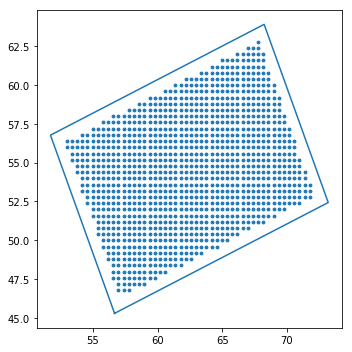

In [9]:
def surface_analysis_grid(idf_surface, grid_spacing=0.2, edge_offset=0.1, offset_distance=0.85):
    """
    Generate an analsyis grid within a boundary defined by an IDF surface.

    A boundary defined by the edge curves of an IDF surface masks a grid of points 
    to get a list of points within that boundary. An edge offset distance can be used 
    to remove analysis points near the boundary edge and an offset given to project 
    points away from the surface normal.

    Args:
        idf_surface (idf.idfobjects["BUILDINGSURFACE:DETAILED"]): The surface within which points are created
        grid_spacing (float): The xy grid spacing between analysis points
        edge_offset (float): The 
        offset_distance (float): The distance from the surface at which the points will be located

    Returns:
        analysis_grid ([[x0, y0, z0], ..., [xn, yn, zn]]): List of analysis points
    """
    
    import numpy as np
    import matplotlib.patches
    
    # List the edge vertices for the imput surface
    edge_vertices = np.array([list(i) for i in idf_surface.coords] + list([idf_surface.coords[0]]))
    xs, ys, zs = np.transpose(edge_vertices)
    
    # Create a boundary patch from the vertex coordinates
    patch = matplotlib.patches.Polygon(list(zip(*[xs, ys])))
    
    # Get extents of boundary for grid mesh
    min_x, max_x, min_y, max_y, max_z = min(xs), max(xs), min(ys), max(ys), max(zs)
    x_range = max_x - min_x
    y_range = max_y - min_y
    
    # Create grid of possible coordinates
    g = np.meshgrid(
        np.arange(min_x - (x_range / 2), max_x + (x_range / 2), grid_spacing), 
        np.arange(min_y - (y_range / 2), max_y + (y_range / 2), grid_spacing)
    )
    coords = list(zip(*(c.flat for c in g)))
    
    # Create a list of valid coordinates (from untransformed)
    coords = np.vstack([p for p in coords if patch.contains_point(p, radius=0)])
    
    analysis_grid = []
    for point in coords:
        distance = []
        for edge_start, edge_end in list(zip(edge_vertices, edge_vertices[1:])):
            distance.append(point_line_distance(point, edge_start[:2], edge_end[:2]))
        if min(distance) > edge_offset:
            analysis_grid.append(point.tolist() + [max_z + offset_distance])
        else:
            pass
    
    return analysis_grid

# Testing
%matplotlib inline
import matplotlib.pyplot as plt
srf = idf.idfobjects["BUILDINGSURFACE:DETAILED"][4]
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
temp = surface_analysis_grid(srf, grid_spacing=0.4, edge_offset=0.8, offset_distance=0.85)
xx = [list(i[:2]) for i in srf.coords] + [[list(i[:2]) for i in srf.coords][0]]
ax.plot([i[0] for i in xx], [i[1] for i in xx])
ax.scatter([i[0] for i in temp], [i[1] for i in temp], s=8)
plt.tight_layout()

In [22]:
idf.idfobjects["BUILDINGSURFACE:DETAILED"][22].coords

[(59.42205810546875, 46.4798583984375, 24.520000457763672),
 (70.4384994506836, 51.23780059814453, 24.520000457763672),
 (70.4384994506836, 51.23780059814453, 28.520000457763672),
 (59.42205810546875, 46.4798583984375, 28.520000457763672)]

In [86]:
edge_offset = 0.25
out = []
for point in temp:
    distance = []
    for edge_start, edge_end in list(zip(edge_vertices, edge_vertices[1:])):
        distance.append(point_line_distance(point, edge_start[:2], edge_end[:2]))
    if min(distance) > edge_offset:
        out.append(point.tolist() + [max_z + offset_distance])
    else:
        pass
    
out

[[56.77133064270042, 45.784188079834124, 0.1],
 [56.97133064270042, 45.784188079834124, 0.1],
 [57.171330642700426, 45.784188079834124, 0.1],
 [56.77133064270042, 45.98418807983413, 0.1],
 [56.97133064270042, 45.98418807983413, 0.1],
 [57.171330642700426, 45.98418807983413, 0.1],
 [57.37133064270043, 45.98418807983413, 0.1],
 [57.57133064270043, 45.98418807983413, 0.1],
 [56.57133064270042, 46.18418807983413, 0.1],
 [56.77133064270042, 46.18418807983413, 0.1],
 [56.97133064270042, 46.18418807983413, 0.1],
 [57.171330642700426, 46.18418807983413, 0.1],
 [57.37133064270043, 46.18418807983413, 0.1],
 [57.57133064270043, 46.18418807983413, 0.1],
 [57.771330642700434, 46.18418807983413, 0.1],
 [57.97133064270044, 46.18418807983413, 0.1],
 [56.57133064270042, 46.38418807983413, 0.1],
 [56.77133064270042, 46.38418807983413, 0.1],
 [56.97133064270042, 46.38418807983413, 0.1],
 [57.171330642700426, 46.38418807983413, 0.1],
 [57.37133064270043, 46.38418807983413, 0.1],
 [57.57133064270043, 46.38

In [78]:
edge_vertices

analysis_points_final = []
for point in analysispoints:
    point_dist = []
    for edge_start, edge_end in list(zip(edge_endpoints, edge_endpoints[1:])):
        point_dist.append(point_to_line_dist(point, [np.array(edge_start), np.array(edge_end)]))

    if np.min(point_dist) > edge_offset:
        analysis_points_final.append(point)
    else:
        pass

array([[56.66794586, 45.29037476, 20.52000046],
       [51.71175766, 56.76583481, 20.52000046],
       [68.23641968, 63.90274811, 20.52000046],
       [73.19261169, 52.42728806, 20.52000046],
       [56.66794586, 45.29037476, 20.52000046]])

In [33]:
# Define a function to create an analysis grid given an IDF surface

def generate_analysis_grid(_idf_surface, offset_distance=0.85, grid_spacing=0.2, edge_offset=0.1):
    
    import numpy as np
    import matplotlib.patches
    
    
    _x, _y, _z = list(zip(*_idf_surface.coords))
    out_dict = {
        "zone_name": "{0}".format(_idf_surface.Zone_Name), 
        "x": list(_x), "y": list(_y), "z": list(_z)
    }
    
    # Create a boundary patch from the vertex coordinates
    patch = matplotlib.patches.Polygon(list(zip(*[out_dict["x"], out_dict["y"]])))
    
    # get extents of boundary for grid mesh
    min_x, max_x, min_y, max_y, max_z = min(out_dict["x"]), max(out_dict["x"]), min(out_dict["y"]), max(out_dict["y"]), max(out_dict["z"])
    x_range = max_x - min_x
    y_range = max_y - min_y

    # create grid of possible coordinates
    g = np.meshgrid(
        np.arange(min_x - (x_range / 2), max_x + (x_range / 2), grid_spacing), 
        np.arange(min_y - (y_range / 2), max_y + (y_range / 2), grid_spacing)
    )
    coords = list(zip(*(c.flat for c in g)))
    
    # Create a list of valid coordinates (from untransformed)
    analysispoints = np.vstack([p for p in coords if patch.contains_point(p, radius=0)])

    # Filter the list to remove points too close to the edge
    edge_endpoints = [list(elem) for elem in list(zip(*[aaa["x"], aaa["y"]]))] + [list(list(zip(*[aaa["x"], aaa["y"]]))[0])]
    
    analysis_points_final = []
    for point in analysispoints:
        point_dist = []
        for edge_start, edge_end in list(zip(edge_endpoints, edge_endpoints[1:])):
            point_dist.append(point_to_line_dist(point, [np.array(edge_start), np.array(edge_end)]))

        if np.min(point_dist) > edge_offset:
            analysis_points_final.append(point)
        else:
            pass
    analysis_points_final = np.array([i.tolist() for i in analysis_points_final])
    analysis_points_final = np.insert(analysis_points_final, 2, offset_distance, axis=1)
    
    
    return analysis_points_final

generate_analysis_grid(idf.idfobjects["BUILDINGSURFACE:DETAILED"][4], offset_distance=0.85, grid_spacing=0.2, edge_offset=0.1)

array([[56.77133064, 45.58418808,  0.85      ],
       [56.97133064, 45.58418808,  0.85      ],
       [56.57133064, 45.78418808,  0.85      ],
       ...,
       [67.77133064, 63.58418808,  0.85      ],
       [67.97133064, 63.58418808,  0.85      ],
       [68.17133064, 63.58418808,  0.85      ]])

AttributeError: 'Polygon' object has no attribute 'path'

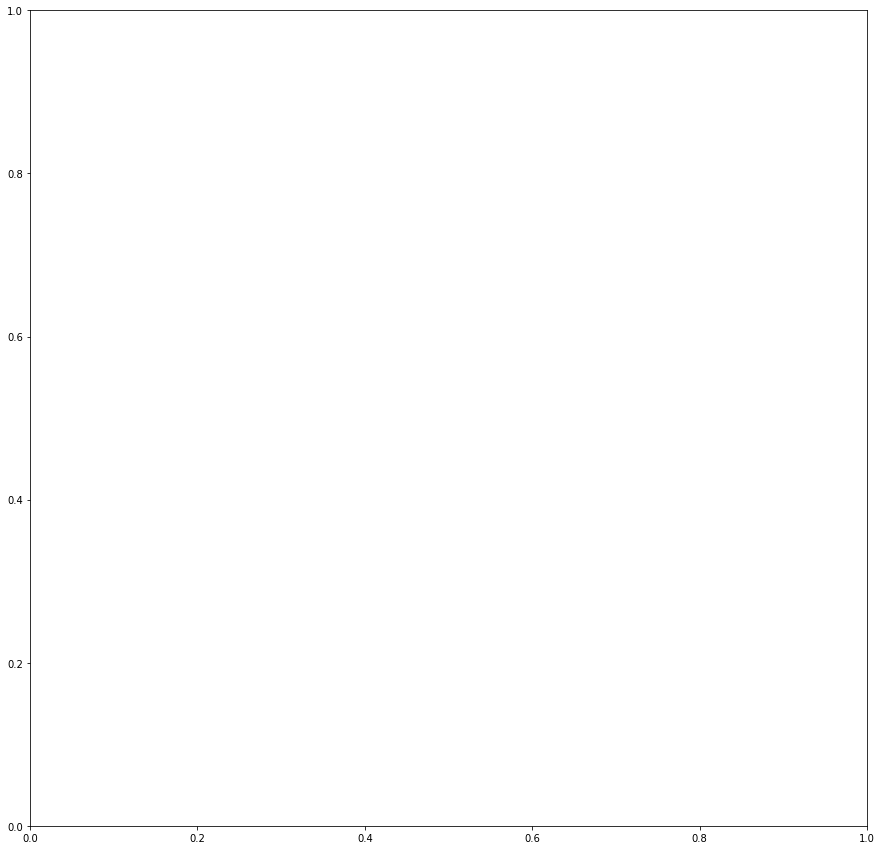

In [25]:
# Dedfine a function to generate a matploltib patch of an IDF floor surface

def floor_patch(_idf_surface):
    import matplotlib.patches
    
    _x, _y, _z = list(zip(*_idf_surface.coords))
    out_dict = {
        "zone_name": "{0}".format(_idf_surface.Zone_Name), 
        "x": list(_x), "y": list(_y), "z": list(_z)
    }
    
    # Create a boundary patch from the vertex coordinates
    patch = matplotlib.patches.Polygon(list(zip(*[out_dict["x"], out_dict["y"]])))
    
    return patch

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
patch = floor_patch(idf.idfobjects["BUILDINGSURFACE:DETAILED"][4])
ax.add_artist(patch)
#ax.set_xlim([50, 75])
#ax.set_ylim([45, 65])
ax.update_datalim(patch.path())
plt.tight_layout()

In [ ]:
def point_to_line_dist(point, line):
        """Calculate the distance between a point and a line segment.

        To calculate the closest distance to a line segment, we first need to check
        if the point projects onto the line segment.  If it does, then we calculate
        the orthogonal distance from the point to the line.
        If the point does not project to the line segment, we calculate the 
        distance to both endpoints and take the shortest distance.

        :param point: Numpy array of form [x,y], describing the point.
        :type point: numpy.core.multiarray.ndarray
        :param line: list of endpoint arrays of form [P1, P2]
        :type line: list of numpy.core.multiarray.ndarray
        :return: The minimum distance to a point.
        :rtype: float
        """
        # unit vector
        unit_line = line[1] - line[0]
        norm_unit_line = unit_line / np.linalg.norm(unit_line)

        # compute the perpendicular distance to the theoretical infinite line
        segment_dist = (
            np.linalg.norm(np.cross(line[1] - line[0], line[0] - point)) /
            np.linalg.norm(unit_line)
        )

        diff = (
            (norm_unit_line[0] * (point[0] - line[0][0])) + 
            (norm_unit_line[1] * (point[1] - line[0][1]))
        )

        x_seg = (norm_unit_line[0] * diff) + line[0][0]
        y_seg = (norm_unit_line[1] * diff) + line[0][1]

        endpoint_dist = min(
            np.linalg.norm(line[0] - point),
            np.linalg.norm(line[1] - point)
        )

        # decide if the intersection point falls on the line segment
        lp1_x = line[0][0]  # line point 1 x
        lp1_y = line[0][1]  # line point 1 y
        lp2_x = line[1][0]  # line point 2 x
        lp2_y = line[1][1]  # line point 2 y
        is_betw_x = lp1_x <= x_seg <= lp2_x or lp2_x <= x_seg <= lp1_x
        is_betw_y = lp1_y <= y_seg <= lp2_y or lp2_y <= y_seg <= lp1_y
        if is_betw_x and is_betw_y:
            return segment_dist
        else:
            # if not, then return the minimum distance to the segment endpoints
            return endpoint_dist

In [16]:
idf.idfobjects["BUILDINGSURFACE:DETAILED"][4]


BuildingSurface:Detailed,
    Below_Srf_4,              !- Name
    FLOOR,                    !- Surface Type
    Interior Floor,           !- Construction Name
    Below,                    !- Zone Name
    outdoors,                 !- Outside Boundary Condition
    ,                         !- Outside Boundary Condition Object
    SunExposed,               !- Sun Exposure
    WindExposed,              !- Wind Exposure
    autocalculate,            !- View Factor to Ground
    4,                        !- Number of Vertices
    56.6679458618,            !- Vertex 1 Xcoordinate
    45.2903747559,            !- Vertex 1 Ycoordinate
    20.5200004578,            !- Vertex 1 Zcoordinate
    51.7117576599,            !- Vertex 2 Xcoordinate
    56.7658348083,            !- Vertex 2 Ycoordinate
    20.5200004578,            !- Vertex 2 Zcoordinate
    68.2364196777,            !- Vertex 3 Xcoordinate
    63.9027481079,            !- Vertex 3 Ycoordinate
    20.5200004578,            !- Ver

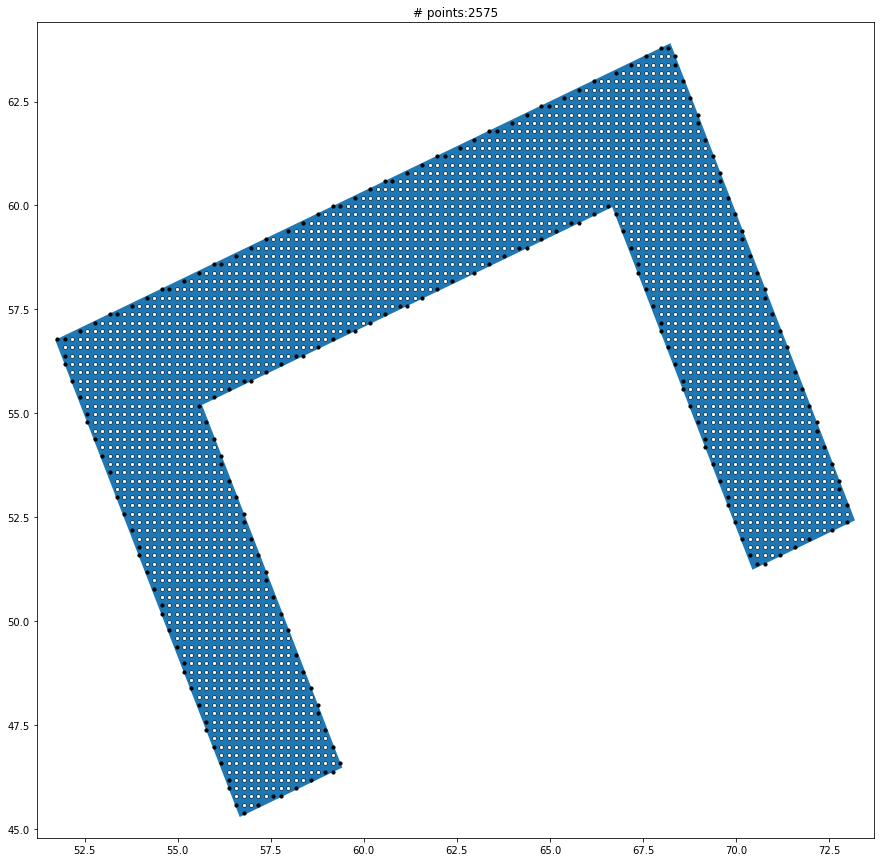

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches
import numpy as np

# Create an empty dictionary to append surfaces to
_floors = []
# Get a list of floors in the model
for _srf in idf.idfobjects["BUILDINGSURFACE:DETAILED"]:
    # Filter the list to only work with "FLOOR"s
    if _srf.Surface_Type == "FLOOR":
        # Add to the dictionary a set of floors (keys) and coordinates (values)
        _x, _y, _z = list(zip(*_srf.coords))
        xgp, n = None, 0
        while xgp is None:
            try:
                _floors.append(
                    {
                        "zone_name": "{0}_{1:02}".format(_srf.Zone_Name, n), 
                        "x": list(_x), 
                        "y": list(_y), 
                        "z": list(_z)
                    }
                )
                xgp = 1
                n+=1
            except:
                pass

# For each floor for which daylight will be analysed, create a polygon describing the floor
aaa = _floors[2]

# Create a boundary patch from the vertex coordinates
patch = matplotlib.patches.Polygon(list(zip(*[aaa["x"], aaa["y"]])))

# get extents of boundary for grid mesh
min_x, max_x, min_y, max_y, max_z = min(aaa["x"]), max(aaa["x"]), min(aaa["y"]), max(aaa["y"]), max(aaa["z"])
x_range = max_x - min_x
y_range = max_y - min_y

# specify grid size and wall/edge offset distance
gridsize = 0.2
edge_offset = 0.1

# create grid of possible coordinates
g = np.meshgrid(
    np.arange(min_x - (x_range / 2), max_x + (x_range / 2), gridsize), 
    np.arange(min_y - (y_range / 2), max_y + (y_range / 2), gridsize)
)
coords = list(zip(*(c.flat for c in g)))

# Create a list of valid coordinates (from untransformed)
analysispoints = np.vstack([p for p in coords if patch.contains_point(p, radius=0)])

# Filter the list to remove points too close to the edge
edge_endpoints = [list(elem) for elem in list(zip(*[aaa["x"], aaa["y"]]))] + [list(list(zip(*[aaa["x"], aaa["y"]]))[0])]

analysis_points_final = []
for point in analysispoints:
    point_dist = []
    for edge_start, edge_end in list(zip(edge_endpoints, edge_endpoints[1:])):
        point_dist.append(point_to_line_dist(point, [np.array(edge_start), np.array(edge_end)]))
        
    if np.min(point_dist) > edge_offset:
        analysis_points_final.append(point)
    else:
        pass
analysis_points_final = np.array([i.tolist() for i in analysis_points_final])

fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.add_artist(patch)
ep = np.array(analysispoints)
ax.scatter(analysispoints[:, 0], analysispoints[:, 1], s=10, color="k", zorder=5)
ax.scatter(analysis_points_final[:, 0], analysis_points_final[:, 1], s=5, color="w", zorder=6)
ax.set_title("# points:{}".format(len(analysis_points_final)))
ax.set_xlim([min_x-0.5, max_x+0.5])
ax.set_ylim([min_y-0.5, max_y+0.5])
plt.show()